# Геннадий Балан

# Домашняя работа по Алгоритмам анализа данных №6

# Тема: Градиентный бустинг. AdaBoost

##### Задача 1
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [18]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [ ]:
Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [ ]:
Напишем функцию, реализующую предсказание в градиентном бустинге.

In [21]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [ ]:
В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [22]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [ ]:
Используем 𝐿2 loss 𝐿(𝑦,𝑧)=(𝑦−𝑧)2, ее производная по 𝑧 примет вид 𝐿′(𝑦,𝑧)=2(𝑧−𝑦). 
Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [23]:
def residual(y, z):
    return - (z - y)

In [ ]:
Реализуем функцию обучения градиентного бустинга.

In [24]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [ ]:
Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [56]:
%%time
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 2.61 s


In [57]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [58]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 685.1185256888393
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4842.3133377269705


In [ ]:
Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [59]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

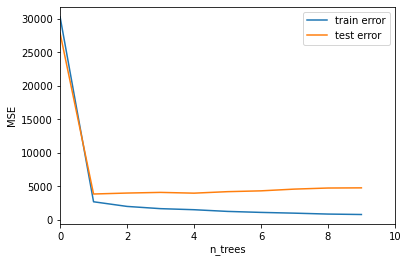

In [60]:
get_error_plot(n_trees, train_errors, test_errors)

In [61]:
def get_error_plot_1(max_depth, train_err, test_err):
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

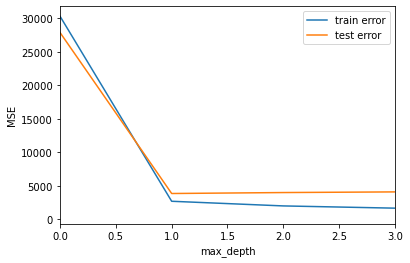

In [62]:
get_error_plot_1(max_depth, train_errors, test_errors)

##### Вывод: на 10 деревьях с глубиной 3 дерева большие ошибки на тренировочной и тестовой выборках,
##### На графике зависимости ошибки MSE от количества деревьев тестова кривая уходит вверх(недообучение).
##### На графике зависимости  ошибки MSE  от глубины графики выходят на асимптоту ,но при очень больших ошибках(недообучение)

#####  Увеличим число деревьев до 50 ,глубину оставим 3 дерева

In [63]:
%%time
n_trees = 50

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 8s


#####  На обработку уже ушло больше минуты в сравнении с 2,5 секундами при 10 деревьях.Зависимость экспоненциальная

In [64]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 4.5833256208335085
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5715.734824572635


#####  Шикарная ошибка на обучающей выборке и ужасная на тесте.Вывод: переобучение

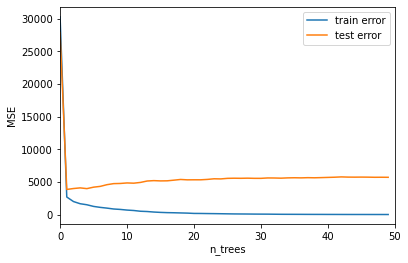

In [65]:
get_error_plot(n_trees, train_errors, test_errors)

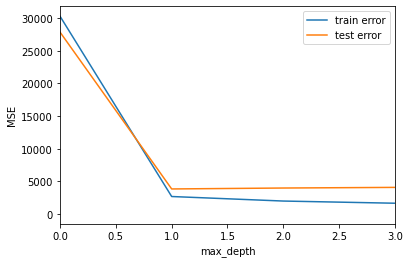

In [66]:
get_error_plot_1(max_depth, train_errors, test_errors)

In [ ]:
##### Вывод: на 50 деревьях с глубиной 3 дерева хорошие ошибки на тренировочной и очень плохие тестовой выборках,
##### На графике зависимости ошибки MSE от количества деревьев тренировочная кривая стремится к 4
#### тестова кривая уходит вверх(переобучение).
##### На графике зависимости  ошибки MSE от глубины деревьев графики выходят на асимптоту ,но при очень больших ошибках(недообучение)

##### Оставим количество деревьев 50,увеличим глубину до 4 

In [67]:
%%time
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 7s


##### Время на обработку то же,что и при глубине 3 дерева

In [68]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 0.0020190288856182224
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 1 на тестовой выборке: 6854.353906212668


##### Сильное переобучение.Видно,что на каждом листе один вопрос и правильный ответ.

##### Попробуем уменьшить шаг до 0.1

In [69]:
%%time
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 7s


In [70]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 384.69491227183323
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 3472.6872489834777


##### Увеличилась ошибка на тренировочном тесте,уменьшилась в 2 раза на тестовом,но всё равно очень большая разница
(на порядок)

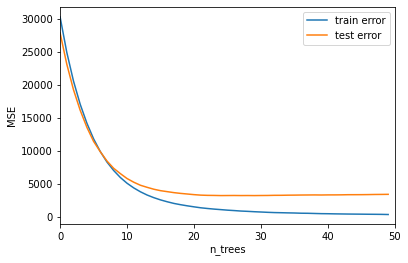

In [71]:
get_error_plot(n_trees, train_errors, test_errors)

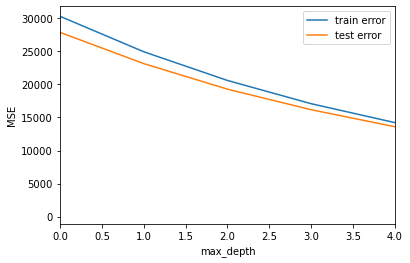

In [72]:
get_error_plot_1(max_depth, train_errors, test_errors)

##### На графике зависимости MSE от количества деревьев график -гладкая кривая.Но видно,что переобучение-хвост тестовой
кривой уходит вверх.На графике зависимости MSE от глубины деревьев--страшное недообучение.Какой-то парадокс)

In [ ]:
В целом вывод: оптимального результата не добились с изменением параметров.Могли бы увеличить количество деревьев и ещё
    раз проверить,но обрабатывать машина будет долго,а на это времени сейчас нет

##### Задача 2
Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [126]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [34]:
Разделим выборку на обучающую и тестовую в соотношении 50/50.

SyntaxError: invalid syntax (<ipython-input-34-7199c452029a>, line 1)

In [127]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.50)

In [ ]:
Напишем функцию, реализующую предсказание в градиентном бустинге.

In [128]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [ ]:
В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [129]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [ ]:
Используем 𝐿2 loss 𝐿(𝑦,𝑧)=(𝑦−𝑧)2, ее производная по 𝑧 примет вид 𝐿′(𝑦,𝑧)=2(𝑧−𝑦). 
Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [130]:
def residual(y, z):
    return - (z - y)

In [ ]:
Реализуем функцию обучения градиентного бустинга.

In [131]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [163]:
%%time
# Число деревьев в ансамбле

n_trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 2.62 s


In [164]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [165]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 679.745649058491
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5995.942805160747


In [166]:
def get_error_plot(n_trees, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    
    
    plt.plot(list(range(n_trees_1)), test_err, label='test error_10_3')
    #plt.plot(list(range(n_trees_2)), test_err, label='test error_50_3')
    plt.legend(loc='upper right')
    plt.show()

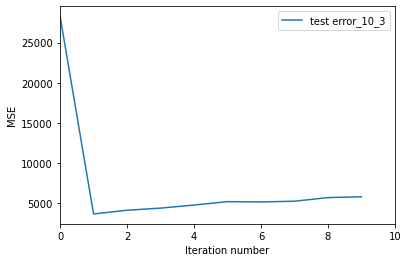

In [167]:
get_error_plot(n_trees, test_errors)

In [172]:
%%time
n_trees = 50

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 9s


In [173]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 7.0507286988558056
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6891.775552698543


In [174]:
def get_error_plot(n_trees, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    
    
    #plt.plot(list(range(n_trees_1)), test_err, label='test error_10_3')
    plt.plot(list(range(n_trees)), test_err, label='test error_50_3')
    plt.legend(loc='upper right')
    plt.show()

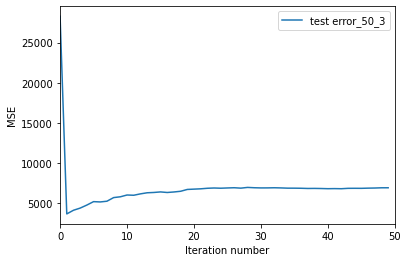

In [175]:
get_error_plot(n_trees, test_errors)

In [ ]:
На одном графике никак не мог получить,программа ругалась на несовпадение размерности

In [ ]:
Вывод:На обоих графиках наблюдается недообучение,результаты хуже,чем в обычном градиентом бустинге.Хотя,может быть и не так,
    если увеличть количество дереьев и глубину.Но это я могу проверить после сдачи работы,нет времени,к сожалению

In [ ]:
Задачу 3,к сожалению,не успеваю решить,а очень хотелось